In [1]:
! pip install datascience

In [2]:
from datascience import * #datascience library because we will use tables
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plots #We will use matplotlib library for plotting
plots.style.use('fivethirtyeight')

#To start with, let's import NLTK, the canonical library for NLP in Python
#NLTK has severl tokeniztion functions, we will use work_tokenize  
from nltk import *
from nltk import word_tokenize  
from nltk.corpus import stopwords
import nltk 
import string
#Punkt tokenizer is the magical unsupervised sentence boundary detection. 
#Punkt knows that the periods in Mr. Smith and Johann S. Bach do not mark sentence boundaries. 
nltk.download('punkt')

from urllib.request import urlopen 

[nltk_data] Downloading package punkt to /Users/gomeandr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import  matplotlib.figure

# 1. Prepare the Table

In [4]:
import xlrd
    

TC_workbook=xlrd.open_workbook(r"brexit.xlsx")

 #sheet
all_sheets_list=TC_workbook.sheet_names()
print("All sheets name in File:",all_sheets_list)
    
first_sheet=TC_workbook.sheet_by_index(0)

    
first_row=first_sheet.row_values(0)
first_col=first_sheet.col_values(0)
sec_col=first_sheet.col_values(1)
thi_col=first_sheet.col_values(2)
four_col=first_sheet.col_values(3)
five_col=first_sheet.col_values(4)
six_col=first_sheet.col_values(5)
sev_col=first_sheet.col_values(6)
eig_col=first_sheet.col_values(7)

All sheets name in File: ['Sheet1']


In [5]:
brexit = Table().with_columns("Headline",first_col,
                             "Location",sec_col,
                             "Snippet",thi_col,
                             "URL",four_col,
                             "Subject",five_col,
                             "Date in Number",six_col,
                             "Type",sev_col,
                             "ID",eig_col)
brexit = brexit.take(np.arange(1,brexit.num_rows))
brexit.show(2)

Headline,Location,Snippet,URL,Subject,Date in Number,Type,ID
What to Watch for in Europe in 2013,[u'Europe'],"The economy, elections, and how to deal with a new Islam ...",https://rendezvous.blogs.nytimes.com/2013/01/01/what-to- ...,"[u'Elections', u'New Year']",41275.0,Blog,50e2ea6100315214fbb81efa
David Cameronüs Losing Battle,"[u'Great Britain', u'Luxembourg', u'Europe']",The British prime ministerüs case against Jean-Claude Ju ...,https://www.nytimes.com/2014/06/26/opinion/mr-camerons-l ...,"[u'Elections', u'Editorials']",41815.0,Editorial,53aaa68638f0d86af25be96a


In [6]:
brexit_days = brexit.with_column("Days",brexit.apply(float,"Date in Number")-41274)
brexit_days.show(2)

Headline,Location,Snippet,URL,Subject,Date in Number,Type,ID,Days
What to Watch for in Europe in 2013,[u'Europe'],"The economy, elections, and how to deal with a new Islam ...",https://rendezvous.blogs.nytimes.com/2013/01/01/what-to- ...,"[u'Elections', u'New Year']",41275.0,Blog,50e2ea6100315214fbb81efa,1
David Cameronüs Losing Battle,"[u'Great Britain', u'Luxembourg', u'Europe']",The British prime ministerüs case against Jean-Claude Ju ...,https://www.nytimes.com/2014/06/26/opinion/mr-camerons-l ...,"[u'Elections', u'Editorials']",41815.0,Editorial,53aaa68638f0d86af25be96a,541


#I face a problem regarding Date Format. Does anyone know how can transfer number to yyyy-mm-dd foramt?

In [7]:
Date_Convert_read=xlrd.open_workbook(r"Data_Convert.xlsx")

 #sheet
all_sheets_list=Date_Convert_read.sheet_names()
print("All sheets name in File:",all_sheets_list)
    
first_sheet_1=Date_Convert_read.sheet_by_index(0)

first_col_1=first_sheet_1.col_values(0)
sec_col_1=first_sheet_1.col_values(1)
thi_col_1=first_sheet_1.col_values(2)
four_col_1= first_sheet_1.col_values(3)

All sheets name in File: ['Date']


In [8]:
Date_Convert = Table().with_columns("Days",first_col_1,
                             "Year",sec_col_1,
                             "Month",thi_col_1,
                             "Date", four_col_1)
Date_Convert.show(2)

Days,Year,Month,Date
1,2013,1,201301
2,2013,1,201301


In [9]:
brexit_date = brexit_days.join("Days",Date_Convert)
brexit_date.show(2)

Days,Headline,Location,Snippet,URL,Subject,Date in Number,Type,ID,Year,Month,Date
1,What to Watch for in Europe in 2013,[u'Europe'],"The economy, elections, and how to deal with a new Islam ...",https://rendezvous.blogs.nytimes.com/2013/01/01/what-to- ...,"[u'Elections', u'New Year']",41275.0,Blog,50e2ea6100315214fbb81efa,2013,1,201301
541,David Cameronüs Losing Battle,"[u'Great Britain', u'Luxembourg', u'Europe']",The British prime ministerüs case against Jean-Claude Ju ...,https://www.nytimes.com/2014/06/26/opinion/mr-camerons-l ...,"[u'Elections', u'Editorials']",41815.0,Editorial,53aaa68638f0d86af25be96a,2014,6,201406


In [10]:
d_float = brexit_date.apply(float,"Date")

d_strs = make_array()
for i in d_float:
    d_str = str(int(i))
    d_strs = np.append(d_strs,d_str)
    
d_strs

brexit_date = brexit_date.with_column("Date",d_strs)
brexit_date.show(2)

Days,Headline,Location,Snippet,URL,Subject,Date in Number,Type,ID,Year,Month,Date
1,What to Watch for in Europe in 2013,[u'Europe'],"The economy, elections, and how to deal with a new Islam ...",https://rendezvous.blogs.nytimes.com/2013/01/01/what-to- ...,"[u'Elections', u'New Year']",41275.0,Blog,50e2ea6100315214fbb81efa,2013,1,201301
541,David Cameronüs Losing Battle,"[u'Great Britain', u'Luxembourg', u'Europe']",The British prime ministerüs case against Jean-Claude Ju ...,https://www.nytimes.com/2014/06/26/opinion/mr-camerons-l ...,"[u'Elections', u'Editorials']",41815.0,Editorial,53aaa68638f0d86af25be96a,2014,6,201406


In [11]:
brexit_date.pivot("Month","Year")

Year,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
2013,1,0,0,0,0,0,0,0,0,0,0,0
2014,0,0,0,0,0,2,0,0,2,0,0,0
2015,0,2,0,0,5,3,3,4,2,2,0,1
2016,2,16,12,26,25,215,205,50,60,82,125,59
2017,76,54,93,67,66,93,43,31,48,49,54,0


# 2. Visualizing Date Date

In [12]:
group_0 = brexit_date.group("Days")
group_1 = brexit_date.group("Date")

In [13]:
group_0

Days,count
1,1
541,1
546,1
619,1
620,1
764,1
772,1
859,1
861,1
863,1


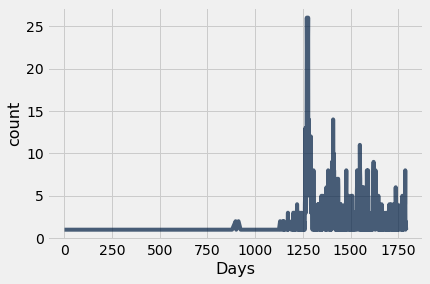

In [14]:
group_0.plot("Days")

In [15]:
group_0.where("count",are.not_equal_to(1))

Days,count
898,2
913,2
1131,2
1145,2
1146,2
1151,2
1172,3
1179,2
1196,2
1200,3


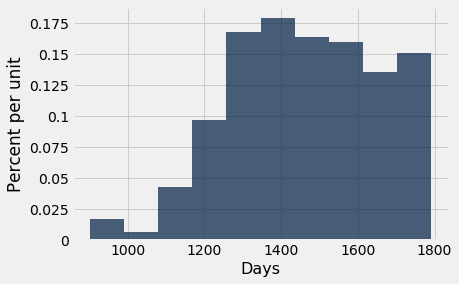

In [16]:
group_0.where("Days",are.above(898)).hist("Days")

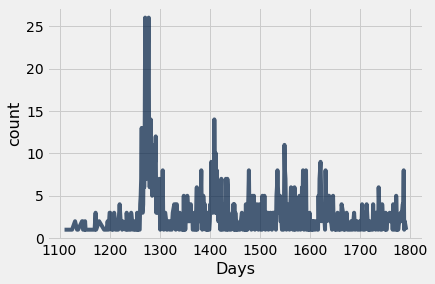

In [17]:
group_0.where("Days",are.above(1100)).plot("Days")

#Maybe we can add another line indicating some important date when some big news or event about Brexit, and to see whether it is consistant with this plot.

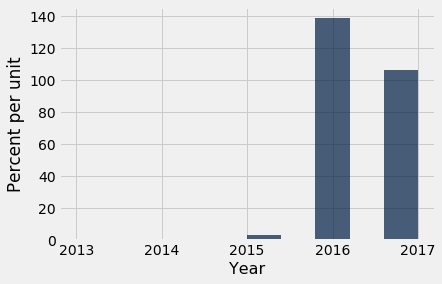

In [18]:
brexit_date.hist("Year")

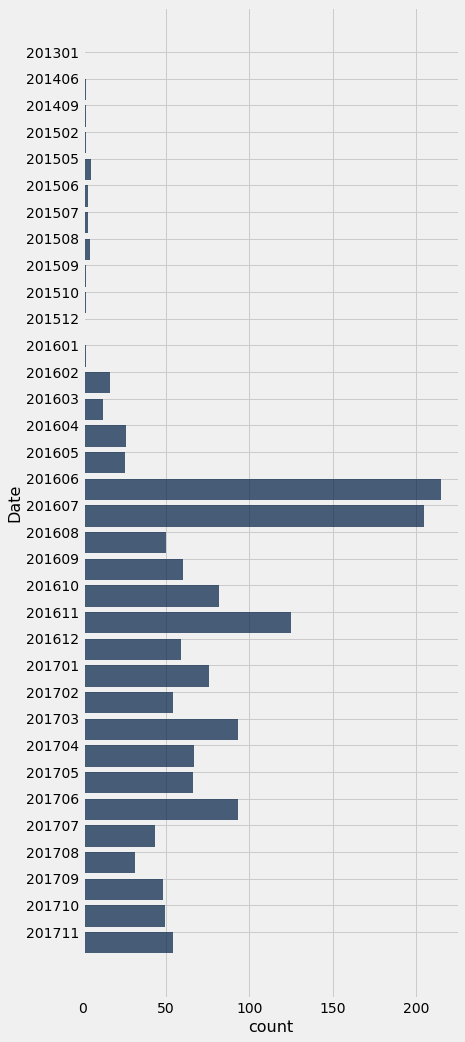

In [19]:
brexit_date.group("Date").barh("Date")

NameError: name 'fig' is not defined

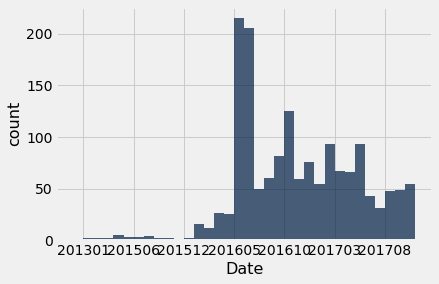

In [40]:
group_1.bar("Date") # Why cannotautofmt_xdate()
fig.autofmt_xdate()
import matplotlib.dates as mdates
ax.fmt_xdata = mdates.DateFormatter('%Y-%m')

#Mabybe R will be a better choice?

# 3. Visualizing Text Data

In [21]:
brexit_date.group("Year")

Year,count
2013,1
2014,4
2015,22
2016,877
2017,674


In [22]:
str_2013 = brexit_date.column("Snippet").item(0)

In [23]:
str_2014 = ""
for i in np.arange(2,6):
    s_2014 = brexit_date.column("Snippet").item(i)
    str_2014 = str_2014 + s_2014

In [24]:
str_2015 = ""
for i in np.arange(6,28):
    s_2015 = brexit_date.column("Snippet").item(i)
    str_2015 = str_2015 + s_2015

In [25]:
str_2016 = ""
for i in np.arange(28,905):
    s_2016 = brexit_date.column("Snippet").item(i)
    str_2016 = str_2016 + s_2016

In [26]:
str_2017 = ""
for i in np.arange(905,1578):
    s_2017 = brexit_date.column("Snippet").item(i)
    str_2017 = str_2017 + s_2017

In [27]:
snippet = Table().with_column("Snippet Each Year", make_array(str_2013,str_2014,str_2015,str_2016,str_2017))
snippet
snippet_text = str_2013 + str_2014 + str_2015 + str_2016 + str_2017

In [28]:
#import word_tokenize 
import nltk
from nltk import word_tokenize
import string
nltk.download('punkt')
#make the text lower case
str_2013_kower = str_2013.lower()
str_2014_kower = str_2014.lower()
str_2015_kower = str_2015.lower()
str_2016_kower = str_2016.lower()
str_2017_kower = str_2017.lower()

print(str_2013_kower)

[nltk_data] Downloading package punkt to /Users/gomeandr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
the economy, elections, and how to deal with a new islamist threat: as politicians make their new year resolutions, these are a few items on europe's agenda for 2013.


In [29]:
#Convert the text to a list of tokens
tokens_str_13 = nltk.word_tokenize(str_2013_kower)
tokens_str_14 = nltk.word_tokenize(str_2014_kower)
tokens_str_15 = nltk.word_tokenize(str_2015_kower)
tokens_str_16 = nltk.word_tokenize(str_2016_kower)
tokens_str_17 = nltk.word_tokenize(str_2017_kower)
tokens = tokens_str_13 +tokens_str_14+tokens_str_15+tokens_str_16+tokens_str_17
#print first 10 tokens 
tokens[:10]

['the', 'economy', ',', 'elections', ',', 'and', 'how', 'to', 'deal', 'with']

In [30]:
from collections import Counter

count = Counter(tokens)
#Array for most common words
most_common_words = [word for word, word_count in Counter(tokens).most_common(10)] 
#Frequency of the most common words
frequency = [word_count for word, word_count in Counter(tokens).most_common(10)] 
#Make a table for words and their frequencies
frequency_table = Table().with_columns('Words', most_common_words, 'Frequency', frequency)
frequency_table

Words,Frequency
the,1881
",",1262
to,1204
of,759
a,749
and,731
in,547
european,296
for,282
is,269


In [31]:
#starting point for punctuation from python string 
#punctuation is '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~-'
#iterate over tokens and remove punctuations you find
tokens = [''.join(c for c in tokens if c not in string.punctuation) for tokens in tokens] 
#string.punctutation includes all kinds of punctuations
tokens = [tokens for tokens in tokens if tokens]
tokens[:10]

['the', 'economy', 'elections', 'and', 'how', 'to', 'deal', 'with', 'a', 'new']

In [32]:
count = Counter(tokens)
count_10 = count.most_common(10) # Most common words before removing the stop words
count_10

[('the', 1882),
 ('to', 1204),
 ('of', 759),
 ('a', 749),
 ('and', 731),
 ('in', 547),
 ('european', 296),
 ('for', 282),
 ('is', 269),
 ('that', 258)]

In [41]:
import nltk
nltk.download('stopwords')
#NTKL contains stopwords for all major languages
#Filter out stopwords
filtered = [w for w in tokens if not w in stopwords.words('english')]
count = Counter(filtered) + Counter(filtered2)
count_10= count.most_common(10) 
count_10

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gomeandr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'Hereüs' is not defined

In [34]:
#We will do stemming using NLTK's Porter Stemmer.
from nltk.stem.porter import PorterStemmer

stemmed = PorterStemmer()

In [35]:
from nltk.stem.porter import PorterStemmer
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

#We pass the filetered tokens and the type of stemmer to stem_token function
stemmed = stem_tokens(filtered, PorterStemmer())
count1 = Counter(stemmed)
count_10 = count1.most_common(10) #Most common words after removing the stop words
count_10

[('european', 300),
 ('need', 219),
 ('know', 198),
 ('union', 181),
 ('start', 181),
 ('vote', 142),
 ('leav', 141),
 ('britain', 134),
 ('new', 123),
 ('ü', 121)]

In [36]:
count = Counter(stemmed)
#Array for most common words
most_common_words = [word for word, word_count in Counter(stemmed).most_common(20)] 
#Frequency of the most common words
frequency = [word_count for word, word_count in Counter(stemmed).most_common(20)] 
#Make a table for words and their frequencies
frequency_table = Table().with_columns('Words', most_common_words, 'Frequency', frequency)
frequency_table.show(20)

Words,Frequency
european,300
need,219
know,198
union,181
start,181
vote,142
leav,141
britain,134
new,123
ü,121


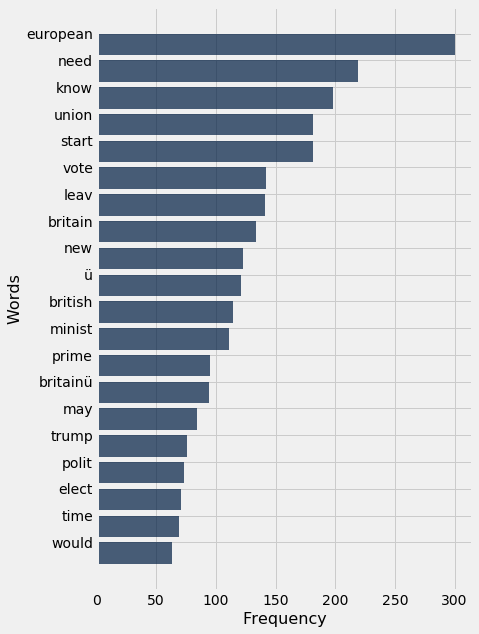

In [37]:
frequency_table.barh('Words', 'Frequency')

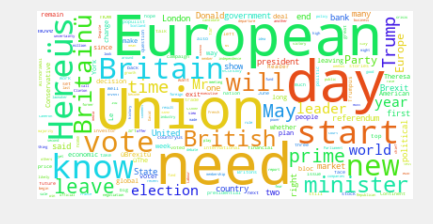

In [38]:
! pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#generating and formatting of wordcloud from the book text
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      max_font_size=60, 
                      random_state=42).generate(snippet_text) 


plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

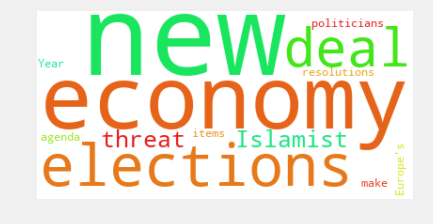

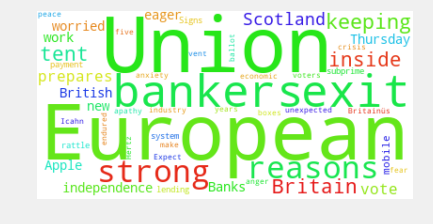

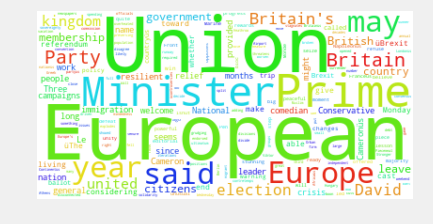

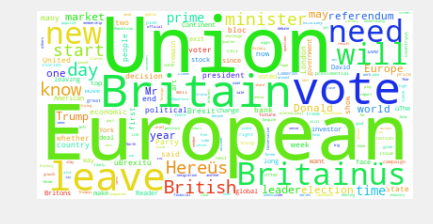

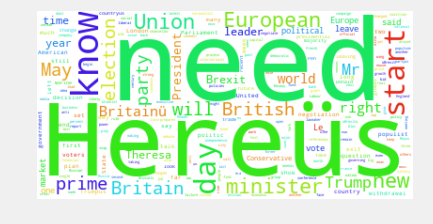

In [39]:
for i in snippet.column(0):
    wordcloud = WordCloud(background_color='white',
                          max_words=400,
                          max_font_size=120, 
                          random_state=42).generate(i) 

    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()